First here is the import for the Predicted vs. Actual data. All the Predicted/Actual information for the different data types (continuous ratings, 6-basic emotions and PANAS) are imported and concatenated to a single file. 

The second chunk is importing the training/test data and concatenating to a single file.


In [3]:
import pandas as pd
import glob
import time

start_time = time.time()

## Moment-by-Moment Ratings

In [10]:
start_time = time.time()

dfPA_cont = pd.DataFrame()
# path = "./ResultsActual/PredictedActual/"
path = "/Users/roydon/Desktop/Cont_extra_results/PredictedActual/"


file_list_cont = glob.glob(path + "*cont*")
file_list_cont.sort()


for file in file_list_cont:
    if file_list_cont.index(file) % 100 == 0:
        print("Processed file", file_list_cont.index(file), "of", len(file_list_cont))
    
    df = pd.read_csv(file)
    df = df.dropna()
    file = file[len(path)+7:]
    split_file = file.split("_")
    df["Fold"]                = split_file[0]
    df["Chunk"]               = split_file[1] 
    df["EmotionMeasure"]      = split_file[2]
    df["BodilyActivity"]      = split_file[3]
    df["OutputType"]          = split_file[4]
    df["ConversationValence"] = split_file[5]
    df["Frequency"]           = split_file[6][:-4]

    dfPA_cont = pd.concat([dfPA_cont, df], ignore_index = True)
    
print("Moment-by-Moment Ratings Shape", dfPA_cont.shape)

outPath = "./ResultsActual/dfPA_cont_python_freq.csv"
dfPA_cont.to_csv(outPath, index = False)

end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken for cont", "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
print("")

Processed file 0 of 5760
Processed file 100 of 5760
Processed file 200 of 5760
Processed file 300 of 5760
Processed file 400 of 5760
Processed file 500 of 5760
Processed file 600 of 5760
Processed file 700 of 5760
Processed file 800 of 5760
Processed file 900 of 5760
Processed file 1000 of 5760
Processed file 1100 of 5760
Processed file 1200 of 5760
Processed file 1300 of 5760
Processed file 1400 of 5760
Processed file 1500 of 5760
Processed file 1600 of 5760
Processed file 1700 of 5760
Processed file 1800 of 5760
Processed file 1900 of 5760
Processed file 2000 of 5760
Processed file 2100 of 5760
Processed file 2200 of 5760
Processed file 2300 of 5760
Processed file 2400 of 5760
Processed file 2500 of 5760
Processed file 2600 of 5760
Processed file 2700 of 5760
Processed file 2800 of 5760
Processed file 2900 of 5760
Processed file 3000 of 5760
Processed file 3100 of 5760
Processed file 3200 of 5760
Processed file 3300 of 5760
Processed file 3400 of 5760
Processed file 3500 of 5760
Proc

## 6-Basic Emotions

In [1]:
start_time = time.time()

dfPA_6emo = pd.DataFrame()

file_list_6emo = glob.glob(path + "*6emo*")
file_list_6emo.sort()

for file in file_list_6emo:
    df = pd.read_csv(file)
    df = df.dropna()
    file = file[len(path)+7:]
    split_file = file.split("_")
    df["Fold"]                = split_file[0]
    df["Chunk"]               = split_file[1] 
    df["EmotionMeasure"]      = split_file[2]
    df["BodilyActivity"]      = split_file[3]
    df["OutputType"]          = split_file[4]
    df["ConversationValence"] = split_file[5][:-4]

    dfPA_6emo = pd.concat([dfPA_6emo, df], ignore_index = True)
    
print("6-Basic Emotions Shape", dfPA_6emo.shape)

outPath = "./ResultsActual/dfPA_6emo_python.csv"
dfPA_6emo.to_csv(outPath, index = False)

end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken for cont and 6emo", "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
print("")

## PANAS

In [1]:
start_time = time.time()

dfPA_PANAS = pd.DataFrame()

file_list_PANAS = glob.glob(path + "*sum.PANAS*")
file_list_PANAS.sort()

for file in file_list_PANAS:
    df = pd.read_csv(file)
    df = df.dropna()
    file = file[len(path)+7:]
    split_file = file.split("_")
    df["Fold"]                = split_file[0]
    df["Chunk"]               = split_file[1] 
    df["EmotionMeasure"]      = split_file[2]
    df["BodilyActivity"]      = split_file[3]
    df["OutputType"]          = split_file[4]
    df["ConversationValence"] = split_file[5][:-4]

    dfPA_PANAS = pd.concat([dfPA_PANAS, df], ignore_index = True)
    
print("PANAS Shape", dfPA_PANAS.shape)

outPath = "./ResultsActual/dfPA_PANAS_python.csv"
dfPA_PANAS.to_csv(outPath, index = False)


end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken for all", "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Moment-by-Moment Ratings Shape (0, 0)


OSError: Cannot save file into a non-existent directory: '/Users/roydon/Desktop/ResultsActual'

## Getting Training vs. Test Accuracy

In [ ]:
import glob
import pandas as pd
import re 
import itertools
import warnings 
import time

warnings.filterwarnings('ignore')
start_time = time.time()

path = "./errout/"

log_list = glob.glob(path + "*.out")
log_list.sort()

log_list = [item for item in log_list if "_I_" not in item]
# regex = re.compile(r".LSTM\d_R_.")
# log_list = [item for item in log_list if not regex.match(item)]


print("{} files in log_list".format(len(log_list)))

data_long = pd.DataFrame()

for file in log_list:
#     print(file)
    
    with open(file) as f:
        data = f.readlines()
        
    epochs = [item for item in data if "Epoch" in item][0]
    epochs = int(re.sub("[^0-9]", "", epochs))
    
    data = [item for item in data if "loss" in item]
    data = [re.sub("[a-zA-Z]", "", item) for item in data]
    data = [item.split(":")[1] for item in data]
    data = [re.sub("[ ]|[-_]", "", item) for item in data]
    
    
    Fold = []
    for i in range(1, 11):
        for j in range(epochs + 1):
            Fold.append(i)

    data = pd.DataFrame({"Error"    : data,
                         "Filename" : [file[len(path):-4]] * len(data),
                         "ErrorType": [item for sublist in [["Training"] * epochs + ["Test"] * 1] * 10 for item in sublist],
                         "Fold"     : Fold})
#     print(data.shape)
    data["Chunk"]          = data["Filename"].str.split("_", expand = True)[0]
    data["Chunk"]          = data["Chunk"].str.replace(r"[A-Z]", "")
    data["EmotionMeasure"] = data["Filename"].str.split("_", expand = True)[1]
    data["BodilyActivity"] = data["Filename"].str.split("_", expand = True)[2]
    data["OutputType"]     = data["Filename"].str.split("_", expand = True)[3]
    data["Valence"]        = data["Filename"].str.split("_", expand = True)[4]
    data_long = pd.concat([data_long, data], ignore_index = True)
    
print(data_long.shape)

data_long.to_csv("/Users/roydon/Desktop/train_test_error.csv")


end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


Importing...
Plotting 6-Basic Emotion Ratings...


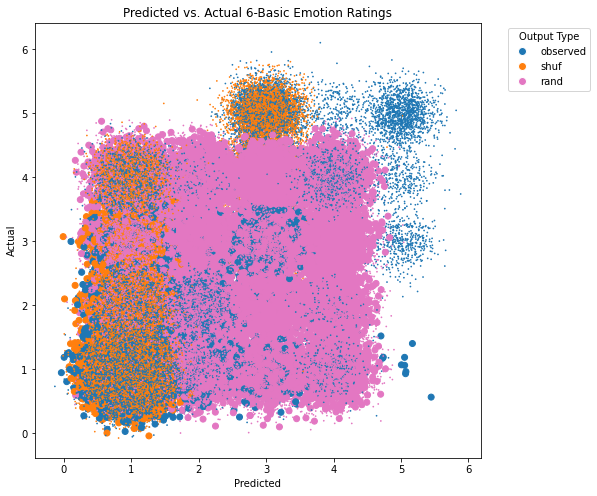

NameError: name 'ggg' is not defined

In [1]:
###### OLD ######

# Plot
import pandas as pd
import numpy as np
from numpy.random import normal as rnorm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import gc
path = "/Users/roydon/Desktop/ResultsActual/"
# path = "C:/Users/golds/OneDrive/Desktop/Results/"

row_lim = 1000000
colors = {'observed':'tab:blue', 'shuf':'tab:orange', 'rand':'tab:pink'}

# Moment-by-Moment Ratings Plots
# print("Importing...")
# dfPA_cont = pd.read_csv(path + "dfPA_cont_python.csv")
# dfPA_cont = dfPA_cont.iloc[::1000, :]


# print("Plotting Moment-by-Moment Ratings...")
# fig, ax = plt.subplots(figsize=(8, 8))

# ax.scatter(dfPA_cont["Response.Self_Predicted"], dfPA_cont["Response.Self_Actual"], c = dfPA_cont["OutputType"].map(colors))

# handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
# ax.legend(title='Output Type', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# ax.set_title("Predicted vs. Actual Moment-by-Moment Ratings")
# ax.set_xlabel("Predicted")
# ax.set_ylabel("Actual")
# plt.show()
# plot_name = path + "PA_cont.png"
# fig.savefig(plot_name, bbox_inches = "tight")

# del dfPA_cont
# del fig
# del ax
# gc.collect()



# 6-Basic Emotions
print("Importing...")
dfPA_6emo = pd.read_csv(path + "dfPA_6emo_python.csv")
dfPA_6emo = dfPA_6emo.iloc[::1000, :]

print("Plotting 6-Basic Emotion Ratings...")

np.random.normal(0, 0.25, [dfPA_6emo.shape[0], 1]) 

fig, ax = plt.subplots(figsize=(8, 8))

n = dfPA_6emo.shape[0]
s = 0.5

ax.scatter(dfPA_6emo["Anger.Self_Predicted"] + rnorm(0, 0.25, [n]),     dfPA_6emo["Anger.Self_Actual"] + rnorm(0, 0.25, [n]),     
           c = dfPA_6emo["OutputType"].map(colors), s = s)
ax.scatter(dfPA_6emo["Disgust.Self_Predicted"] + rnorm(0, 0.25, [n]),   dfPA_6emo["Disgust.Self_Actual"] + rnorm(0, 0.25, [n]),   
           c = dfPA_6emo["OutputType"].map(colors), s = s)
ax.scatter(dfPA_6emo["Fear.Self_Predicted"] + rnorm(0, 0.25, [n]),      dfPA_6emo["Fear.Self_Actual"] + rnorm(0, 0.25, [n]),      
           c = dfPA_6emo["OutputType"].map(colors), s = s)
ax.scatter(dfPA_6emo["Happiness.Self_Predicted"] + rnorm(0, 0.25, [n]), dfPA_6emo["Happiness.Self_Actual"] + rnorm(0, 0.25, [n]), 
           c = dfPA_6emo["OutputType"].map(colors), s = s)
ax.scatter(dfPA_6emo["Sadness.Self_Predicted"] + rnorm(0, 0.25, [n]),   dfPA_6emo["Sadness.Self_Actual"] + rnorm(0, 0.25, [n]),   
           c = dfPA_6emo["OutputType"].map(colors))
ax.scatter(dfPA_6emo["Surprise.Self_Predicted"] + rnorm(0, 0.25, [n]),  dfPA_6emo["Surprise.Self_Actual"] + rnorm(0, 0.25, [n]),  
           c = dfPA_6emo["OutputType"].map(colors), s = s)

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Output Type', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title("Predicted vs. Actual 6-Basic Emotion Ratings")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()
plot_name = path + "PA_6emo.png"
fig.savefig(plot_name, bbox_inches = "tight")

del dfPA_6emo
del fig
del ax
gc.collect()

ggg

# PANAS
print("Importing...")
dfPA_PANAS = pd.read_csv(path + "dfPA_PANAS_python.csv")
dfPA_PANAS = dfPA_PANAS.iloc[::1000, :]

print("Plotting PANAS Ratings...")

fig, ax = plt.subplots(figsize=(8, 8))

n = dfPA_PANAS.shape[0]

ax.scatter(dfPA_PANAS["PANAS.Positive_Predicted"] + rnorm(0, 0.25, [n]), dfPA_PANAS["PANAS.Positive_Actual"] + rnorm(0, 0.25, [n]), 
           c = dfPA_PANAS["OutputType"].map(colors))
ax.scatter(dfPA_PANAS["PANAS.Negative_Predicted"] + rnorm(0, 0.25, [n]), dfPA_PANAS["PANAS.Negative_Actual"] + rnorm(0, 0.25, [n]), 
           c = dfPA_PANAS["OutputType"].map(colors))

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Output Type', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title("Predicted vs. Actual PANAS Ratings")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()
plot_name = path + "PA_PANAS.png"
fig.savefig(plot_name, bbox_inches = "tight")

del dfPA_PANAS
del fig
del ax
gc.collect()